In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
expenditure_description = input("Select the expenditure type to analyse: ")

Select the expenditure type to analyse: Teaching Staff (E01)


In [3]:
london = input("Include London in the analysis, exclude London, or exclude all but London? include/exclude/london: ")

Include London in the analysis, exclude London, or exclude all but London? include/exclude/london: include


In [4]:
school_phase = input("Select school phase. Nursery/Primary: ")

Select school phase. Nursery/Primary: Primary


In [8]:
# PREPARE THE MTC DATA BY LOCAL AUTHORITY
file_path = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/mtc_regional_and_local_authority_2022.csv'
region_df = pd.read_csv(file_path)
region_df.to_csv('region_df.csv', index=False)

# Filter rows so that only All Pupils remains
la_mean_df = region_df[region_df['characteristic_group'] == 'All pupils']

# Filter to have only have Total for gender
la_gender_df = la_mean_df[la_mean_df['gender'] == 'Total']

# Remove unnecessary columns
la_score_df = la_gender_df[['la_name', 'mtc_average_score']]

la_score_df = la_score_df.copy()

# Change string to float in score column
la_score_df.loc[:, 'mtc_average_score'] = pd.to_numeric(la_score_df['mtc_average_score'], errors='coerce')

# Drop empty rows
la_score_df.dropna(subset=['mtc_average_score'], inplace=True)

In [9]:
# Create a class to easily filter the spending data
class SpendingData:
    def __init__(self, data_file):
        self.data = pd.read_csv(data_file)
        
    def to_csv(self, file_name):
        self.data.to_csv(file_name, index=False)
    
    def check_columns(self):
        print(self.data.info())
    
    def filter_columns(self, columns_to_keep):
        self.data = self.data[columns_to_keep]
        
    def drop_na(self, column):
        self.data = self.data.dropna(subset=[column])
    
    def filter_rows(self, condition):
        self.data = self.data.loc[condition]
    
    def get_col_avg(self, column_name_to_groupby, column_name_to_avg):
        self.data[column_name_to_avg] = self.data[column_name_to_avg].astype(float)
        self.data = self.data.groupby(column_name_to_groupby)[column_name_to_avg].mean().reset_index()

# Create a function to make a scatter plot
def create_scatter(x_column, y_column, dataframe, title):
    sns.regplot(x= x_column, 
            y= y_column, 
            data=dataframe,
            scatter_kws={'color': 'green', 'edgecolor': 'white', 'linewidths': 0.7}, 
            line_kws={'color': 'red', 'linewidth': 1.5})
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.title(title, fontsize=14)
    plt.rcParams['axes.facecolor'] = '#F8F8F8'
    plt.grid(linewidth=0.5, linestyle='--', color='gray')
    sns.despine()  
    plt.tick_params(axis='both', which='both', labelsize=10)
    return plt.show()


# Create a function to calculate the spearman rank coefficient
def spearmanr(x_column, y_column, dataframe):
    spearmanr_coeff, spearmanr_pvalue = stats.spearmanr(dataframe[x_column], dataframe[y_column])
    print(f'Spearmanr_coeff = {spearmanr_coeff}')
    print(f'spearmanr_pvalue = {spearmanr_pvalue}')

/var/folders/0x/l5d3n5057_q6d5cdy8j9qmv00000gn/T/ipykernel_9399/3289793432.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(data_file)


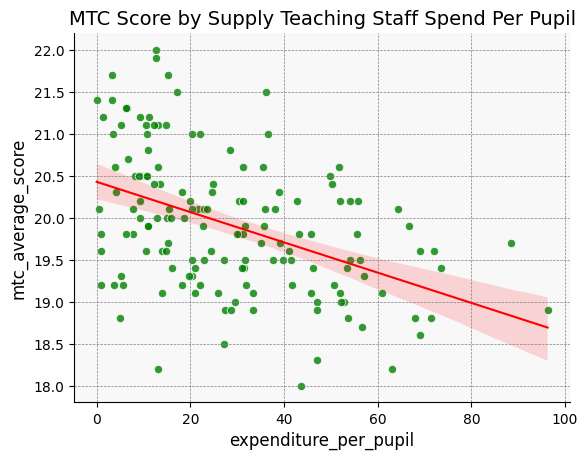

Spearmanr_coeff = -0.45274719271020736
spearmanr_pvalue = 5.992449009899718e-09


In [11]:
data_file = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/cfr_expenditure_la_regional_national2.csv'
df = SpendingData(data_file)
df.drop_na('la_name')
df.filter_rows(df.data['expenditure_description']=='Supply teaching staff (E02)')
df.filter_rows(df.data['school_phase']=='Primary')
df.get_col_avg('la_name', 'expenditure_per_pupil')
supply_teaching_staff_df = pd.merge(df.data, la_score_df, on='la_name')
supply_teaching_staff_df.to_csv('teaching_staff_df.csv', index=False)
create_scatter('expenditure_per_pupil', 'mtc_average_score', supply_teaching_staff_df, 'MTC Score by Supply Teaching Staff Spend Per Pupil')
spearmanr('expenditure_per_pupil', 'mtc_average_score', supply_teaching_staff_df)
supply_teaching_staff_df.to_csv('supply_teaching_staff_df.csv', index=False)

In [12]:
import matplotlib.font_manager as font_manager
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/Supplemental/Corsiva.ttc',
 '/System/Library/Fonts/Supplemental/Verdana.ttf',
 '/System/Library/Fonts/NotoSerifMyanmar.ttc',
 '/System/Library/Fonts/SFCompactText.ttf',
 '/System/Library/Fonts/Supplemental/Al Nile.ttc',
 '/System/Library/Fonts/Supplemental/AppleMyungjo.ttf',
 '/System/Library/Fonts/Supplemental/Luminari.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf',
 '/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf',
 '/System/Library/Fonts/HelveticaNeueDeskInterface.ttc',
 '/System/Library/Fonts/Supplemental/STIXIntUpReg.otf',
 '/System/Library/Fonts/KohinoorBangla.ttc',
 '/Library/Fonts/TeamViewer13.otf',
 '/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/Diwan Kufi.ttc',
 '/System/Library/Fonts/Supplemental/NewPeninimMT.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf',
 '/System/Library/Font

/var/folders/0x/l5d3n5057_q6d5cdy8j9qmv00000gn/T/ipykernel_9399/3289793432.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(data_file)


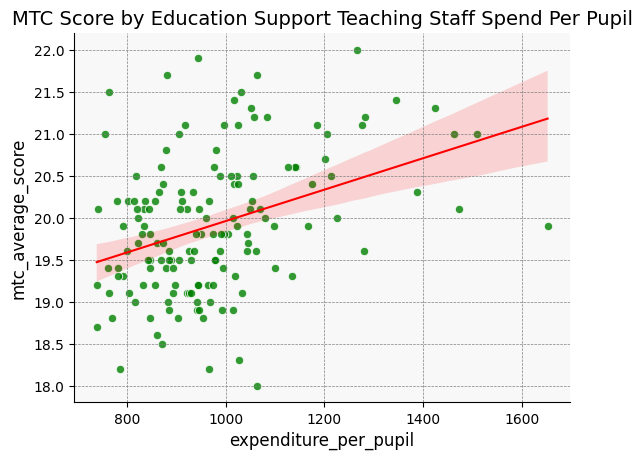

Spearmanr_coeff = 0.3576735333613423
spearmanr_pvalue = 7.006062574960265e-06


In [13]:
data_file = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/cfr_expenditure_la_regional_national2.csv'
df = SpendingData(data_file)
df.drop_na('la_name')
df.filter_rows(df.data['expenditure_description']=='Education support staff (E03)')
df.filter_rows(df.data['school_phase']=='Primary')
df.get_col_avg('la_name', 'expenditure_per_pupil')
support_teaching_staff_df = pd.merge(df.data, la_score_df, on='la_name')
support_teaching_staff_df.to_csv('support_staff_df.csv', index=False)
create_scatter('expenditure_per_pupil', 'mtc_average_score', support_teaching_staff_df, 'MTC Score by Education Support Teaching Staff Spend Per Pupil')
spearmanr('expenditure_per_pupil', 'mtc_average_score', support_teaching_staff_df)

/var/folders/0x/l5d3n5057_q6d5cdy8j9qmv00000gn/T/ipykernel_9399/3289793432.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(data_file)


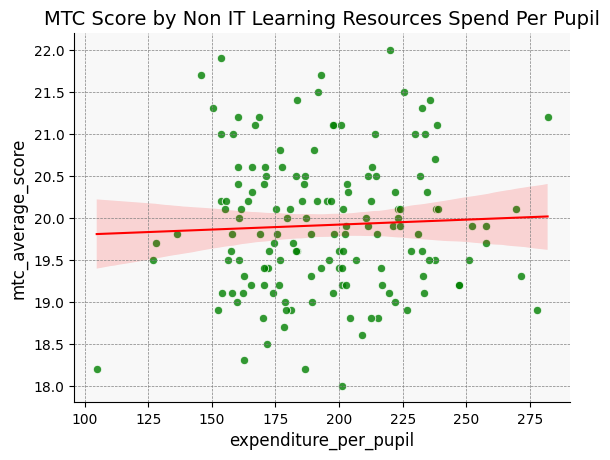

Spearmanr_coeff = 0.023724754303958727
spearmanr_pvalue = 0.7732108339478292


In [14]:
data_file = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/cfr_expenditure_la_regional_national2.csv'
df = SpendingData(data_file)
df.drop_na('la_name')
df.filter_rows(df.data['expenditure_description']=='Learning resources (not ICT equipment) (E19)')
df.filter_rows(df.data['school_phase']=='Primary')
df.get_col_avg('la_name', 'expenditure_per_pupil')
learning_resources_nonit_df = pd.merge(df.data, la_score_df, on='la_name')
learning_resources_nonit_df.to_csv('learning_resources_nonit_spend_mtc.csv', index=False)
create_scatter('expenditure_per_pupil', 'mtc_average_score', learning_resources_nonit_df, 'MTC Score by Non IT Learning Resources Spend Per Pupil')
spearmanr('expenditure_per_pupil', 'mtc_average_score', learning_resources_nonit_df)

/var/folders/0x/l5d3n5057_q6d5cdy8j9qmv00000gn/T/ipykernel_9399/3289793432.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(data_file)


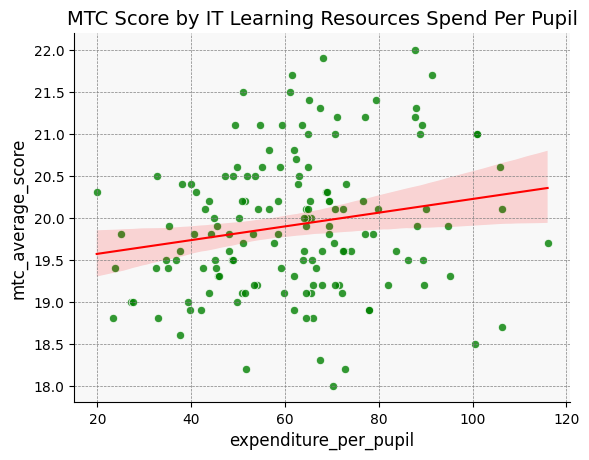

Spearmanr_coeff = 0.16618181419145195
spearmanr_pvalue = 0.04210996762111822


In [15]:
data_file = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/cfr_expenditure_la_regional_national2.csv'
df = SpendingData(data_file)
df.drop_na('la_name')
df.filter_rows(df.data['expenditure_description']=='ICT learning resources (E20)')
df.filter_rows(df.data['school_phase']=='Primary')
df.get_col_avg('la_name', 'expenditure_per_pupil')
ICT_learning_resources_df = pd.merge(df.data, la_score_df, on='la_name')
ICT_learning_resources_df.to_csv('ICT_learning_resources_df.csv', index=False)
create_scatter('expenditure_per_pupil', 'mtc_average_score', ICT_learning_resources_df, 'MTC Score by IT Learning Resources Spend Per Pupil')
spearmanr('expenditure_per_pupil', 'mtc_average_score', ICT_learning_resources_df)

/var/folders/0x/l5d3n5057_q6d5cdy8j9qmv00000gn/T/ipykernel_9399/3289793432.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(data_file)


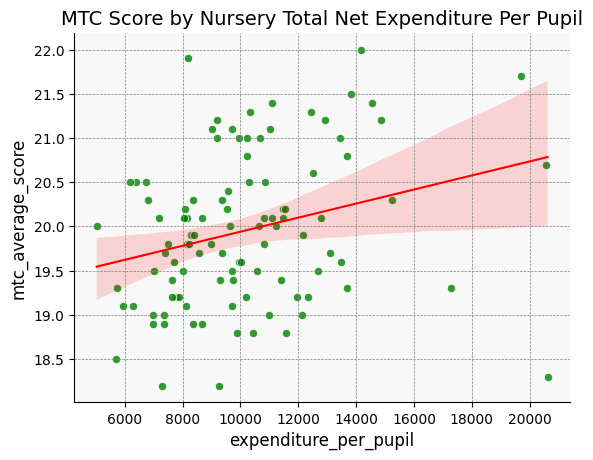

Spearmanr_coeff = 0.3033978842928137
spearmanr_pvalue = 0.0018372543578829414


In [16]:
# MTC to PRIMARY Total Net Expenditure Per Pupil

data_file = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/cfr_expenditure_la_regional_national2.csv'
df = SpendingData(data_file)
df.drop_na('la_name')
df.filter_rows(df.data['expenditure_description']=='Total net expenditure')
df.filter_rows(df.data['school_phase']=='Nursery')
df.get_col_avg('la_name', 'expenditure_per_pupil')
nursery_total_df = pd.merge(df.data, la_score_df, on='la_name')
nursery_total_df.to_csv('nursery_total_df.csv', index=False)
create_scatter('expenditure_per_pupil', 'mtc_average_score', nursery_total_df, 'MTC Score by Nursery Total Net Expenditure Per Pupil')
spearmanr('expenditure_per_pupil', 'mtc_average_score', nursery_total_df)


/var/folders/0x/l5d3n5057_q6d5cdy8j9qmv00000gn/T/ipykernel_9399/3289793432.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(data_file)


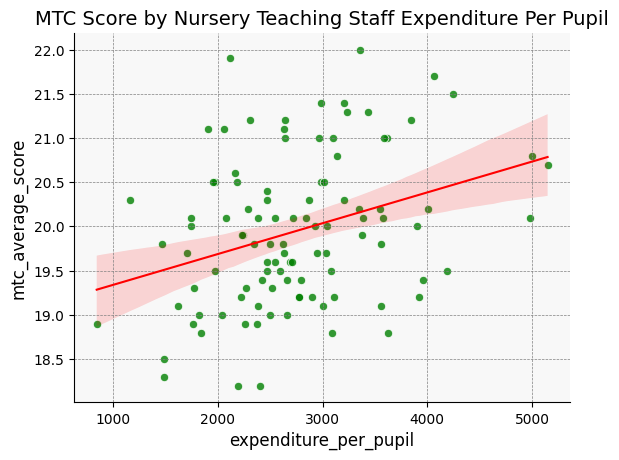

Spearmanr_coeff = 0.30611871971366894
spearmanr_pvalue = 0.0016625435786530368


In [17]:
# MTC to PRIMARY Total Net Expenditure Per Pupil

data_file = 'data_file/multiplication-tables-check-attainment_2021-22 (1)/data/cfr_expenditure_la_regional_national2.csv'
df = SpendingData(data_file)
df.drop_na('la_name')
df.filter_rows(df.data['expenditure_description']=='Teaching Staff (E01)')
df.filter_rows(df.data['school_phase']=='Nursery')
df.get_col_avg('la_name', 'expenditure_per_pupil')
nursery_teaching_staff_df = pd.merge(df.data, la_score_df, on='la_name')
nursery_teaching_staff_df.to_csv('nursery_teaching_staff_df.csv', index=False)
create_scatter('expenditure_per_pupil', 'mtc_average_score', nursery_teaching_staff_df, 'MTC Score by Nursery Teaching Staff Expenditure Per Pupil')
spearmanr('expenditure_per_pupil', 'mtc_average_score', nursery_teaching_staff_df)